In [1]:
!pip install transformers simpletransformers torch torchvision torchaudio sacremoses

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4

In [2]:
import os
os.environ['TRANSFORMERS_NO_ADVISORY_WARNINGS'] = 'true'
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import sklearn
# import argparse
import os
from simpletransformers.ner import NERArgs, NERModel
import torch
import time
# import wandb

In [4]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
labels = ['B', ':', ';', ',', '.', '-', '...', '?', '!']

## Import data to tsv format with columns

In [7]:
expected_train = '/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/2021-punctuation-restoration/train/expected.tsv'
expected_test_a = '/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/2021-punctuation-restoration/test-A/expected.tsv'
train_dir="/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/tsv/train.tsv"
test_dir='/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/tsv/test_a.tsv'

In [8]:
# _text = """
# co znaczy, że beginki " padły ofiarą reformacji "? grzesie2k wpis na słabym poziomie bzdurna informacja o 50 spalonych waldensach; po co w bibliografii pseudonaukowa książka magdaleny ogórek? fragment recenzji z księgarni gandalf: " magdalena ogórek do inkwizycji oraz kościoła ma stosunek jednoznaczny, pisząc o inkwizycyjnej pożodze oraz występkach heretyków spreparowanych przez inkwizytorów, którzy siali spustoszenie oraz o tym jak to w połowie xiii w? duchowni skupiali się na obsadzaniu stanowisk kościelnych, budowaniu zamętu przez interdykty, schizmy i walki, lekceważyli obowiązki duszpasterskie. nie ukrywa też, że jej celem jest próba rehabilitacji heretyków. takie jednoznacznie ideologiczne ustawienie problematyki nie ma wiele wspólnego z prawdą o epoce, obiektywizmem historycznym. w książce obok ułomności merytorycznych i logicznych, uderzają także te formalne. nie do końca można tym obciążać autorkę, gdyż istnieje coś takiego jak redakcja czy korekta wydawnicza, których najwyraźniej nie uczyniono. w przeciwnym razie opublikowany tekst, zwłaszcza w warstwie przypisów, nie przypominałby brudnopisu, gdzie bez przerwy pojawiają się miejsca niechlujne i błędne, niedopowiedzenia oraz niekonsekwencje. zaraz na początku uderza brak paginacji w spisie treści. niedociągnięcia te obciążają zarówno magdalenę ogórek, jak i wydawnictwo waw z raciborza, które książkę wydało zapewne w pośpiechu, bez należytej staranności. ta nieszczęsna forma oddaje poziom treści, co w sumie czyni przygnębiające wrażenie. autorka omawianej książki zupełnie nie panuje nad tekstem, popełnia rażące błędy tak merytoryczne, jak i formalne, a w wielu miejscach zdaje się nie mieć elementarnej wiedzy na opisywany temat. wszystkie rzekomo? nowe źródła? mające nadać sens tej rozprawie okazują się być znane, tylko zostały przez nią błędnie zidentyfikowane, natomiast w rozważaniach nie uwzględniono źródeł ogólnie dostępnych. wszystko to skłania do konkluzji, że pracy tej trudno przyznać wymiar naukowy ". 1 podpisuj się. 2 chcesz rehabilitować przeciwników beginek? czemu? zezen naruszenie praw autorskich? słowo w słowo:
# fundacja mozilla jest organizacją non- profit powstałą 15 lipca 2003 roku. celem jej jest organizacja prawnego i finansowego projektu mozilla i jego pochodnych. podała ona ostatnio, że planowane jest wprowadzenie nowej aktualizacji przeglądarki firefox 2 do wersji 2007 podano również orientacyjną datę wprowadzenia aktualizacji na 14 października 2007 roku. ostatnio okazało się również, że korzystanie z firefox i quicktime może być niebezpieczne dla użytkowników komputerów. błąd związany jest z jest z formatem media link. " w praktyce luka ta pozwala na zrobienie z przeglądarką wszystkiego, czego zapragnie napastnik. może on doinstalować do niej backdoora, a jeśli przeglądarka będzie uruchomiona z przywilejami administratora- to także zainstalować w systemie dowolny program "- poinformował petko petkov zajmujący sie testowaniem zabezpieczeń. " wydaje się, że jest to bardzo poważna sprawa. współpracujemy w tym zakresie z apple i badamy, w jakim stopniu problem leży po naszej stronie "- powiedziała window snyder, szefowa działu bezpieczeństwa mozilla foundation. firma apple wydała oświadczenie, w którym poinformowała, że problem zostanie niebawem rozwiązany.
# """

import re

def to_tsv_output(input_file_path, output_file_path):

    df = pd.DataFrame(columns=["words", "labels",  "times", "sentence_id"])
    labels = [':', ';', ',', '.', '-', '...', '?', '!']
    rows = []
    sentence_id = 0

    # with open(input_file_path, 'r', encoding='utf-8') as file:
    #     _text = file.read()
    # words = re.findall(r"[\w']+|[.:,!?;\"-]", _text)


    with open(input_file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line in lines:
          words = re.findall(r"[\w']+|[.:,!?;\"-]", line)
          # print(words)
          # break
          for i, word in enumerate(words):
            if word in labels:
                continue
            if i+1 < len(words):
              next_word = words[i + 1]
              if next_word not in labels:
                label = 'B'
              else:
                label = next_word
              rows.append({"words": word, "labels": label,   "times": " ", "sentence_id": sentence_id})
            # if
            #   label = word if word in labels else 'B'
            #   if  word not in labels:
            #       if i+1 <= len(words):

            #         next_word = words[i + 1]
            #         if next_word not in labels:
            #             label='B'
            #         else:
            #             label=next_word
            #   rows.append({"words": word, "labels": label,   "times": " ", "sentence_id": sentence_id})


                    # if word == '.':  # oryginalnie to jest na poziomie json'a
          sentence_id += 1

    df = pd.concat([df, pd.DataFrame(rows)])
    df.to_csv(output_file_path, sep='\t', index=False)


In [9]:
to_tsv_output(expected_train, train_dir )
to_tsv_output(expected_test_a, test_dir )

In [10]:
!tail -10 /content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/tsv/train.tsv

wydziału	B	 	799
matematyki	B	 	799
i	B	 	799
informatyki	B	 	799
przy	B	 	799
ul	.	 	799
chopina	B	 	799
30	B	 	799
wstęp	B	 	799
wolny	.	 	799


In [11]:
!tail -10 /content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/tsv/test_a.tsv

politycznego	B	 	199
z	B	 	199
ruchem	B	 	199
ludowo	-	 	199
narodowym	B	 	199
a	B	 	199
nie	B	 	199
z	B	 	199
radiem	B	 	199
maryja	.	 	199


In [12]:
def f1_per_label(y_true, y_pred):
    values = calculate_metric(f1_score, y_true, y_pred, labels=labels[1:], average=None, zero_division=0)
    return {str(i): v for i, v in enumerate(values)}


def pr_per_label(y_true, y_pred):
    values = calculate_metric(precision_score, y_true, y_pred, labels=labels[1:], average=None, zero_division=0)
    return {str(i): v for i, v in enumerate(values)}
    # return values[label]


def rc_per_label(y_true, y_pred):
    values = calculate_metric(recall_score, y_true, y_pred, labels=labels[1:], average=None, zero_division=0)
    return {str(i): v for i, v in enumerate(values)}
    # return values[label]


def calculate_metric(func, y_true, y_pred, **kwargs):
    y_true_res = []
    y_pred_res = []

    for t in y_true:
        y_true_res.extend(t)

    for p in y_pred:
        y_pred_res.extend(p)

    return func(y_true_res, y_pred_res, **kwargs)

In [13]:
train_data_dir=train_dir
eval_data_dir=test_dir
epochs=5
learning_rate=2e-5
batch_size=12
accumulation_steps=1
model_name="allegro/herbert-large-cased"
model_type='herbert'
warmup_steps=0
eval_steps=380
# eval_during_training, action='store_true'
eval_during_training=True
max_seq_len=256
# use_dice, action='store_true'
use_dice=True
# use_focal, action='store_true'
use_focal=True
seed=2
early_stopping_metric='f1_weighted'
focal_alpha=0.25
weights = None



In [14]:
train_data = pd.read_csv(train_data_dir, sep='\t',header=0)
eval_data = pd.read_csv(eval_data_dir, sep='\t', header=0)

In [15]:
train_data[:5]

,words,labels,times,sentence_id
0,w,B,,0
1,wywiadzie,B,,0
2,dla,B,,0
3,"""",B,,0
4,polski,B,,0


In [16]:
len(train_data)

164705

In [17]:
ner_args = NERArgs()
ner_args.early_stopping_metric = early_stopping_metric
ner_args.early_stopping_metric_minimize = False
ner_args.model_type = model_type
ner_args.model_name = model_name
ner_args.train_batch_size = batch_size
ner_args.eval_batch_size = batch_size
ner_args.gradient_accumulation_steps = accumulation_steps
ner_args.learning_rate = learning_rate
ner_args.num_train_epochs = epochs
ner_args.evaluate_during_training = eval_during_training
ner_args.evaluate_during_training_steps = eval_steps
ner_args.max_seq_length = max_seq_len
ner_args.manual_seed = seed
ner_args.warmup_steps = warmup_steps
ner_args.save_eval_checkpoints = False
ner_args.use_multiprocessing = False
ner_args.use_multiprocessing_for_evaluation = False

In [18]:
if use_dice:
        ner_args.loss_type = 'dice'
        ner_args.loss_args = {
            'smooth': 0.001,
            'square_denominator': True,
            'with_logits': True,
            'ohem_ratio': 0.0,
            'alpha': 0,
            'reduction': "mean",
            'index_label_position': True
        }
if use_focal:
  ner_args.loss_type = 'focal'
  ner_args.loss_args = {
            'alpha': focal_alpha,
            'gamma': 2,
            'reduction': 'mean',
            # 'eps': 1e-6,
            'ignore_index': -100,
        }

In [19]:
metrics = {
        'f1_micro': lambda y_true, y_pred: calculate_metric(f1_score, y_true, y_pred, average='micro', zero_division=0, labels=labels[1:]),
        'f1_macro': lambda y_true, y_pred: calculate_metric(f1_score, y_true, y_pred, average='macro', zero_division=0, labels=labels[1:]),
        'f1_weighted': lambda y_true, y_pred: calculate_metric(f1_score, y_true, y_pred, average='weighted', zero_division=0, labels=labels[1:]),
        'pr_micro': lambda y_true, y_pred: calculate_metric(precision_score, y_true, y_pred, average='micro', zero_division=0, labels=labels[1:]),
        'pr_macro': lambda y_true, y_pred: calculate_metric(precision_score, y_true, y_pred, average='macro', zero_division=0, labels=labels[1:]),
        'pr_weighted': lambda y_true, y_pred: calculate_metric(precision_score, y_true, y_pred, average='weighted', zero_division=0, labels=labels[1:]),
        'rc_micro': lambda y_true, y_pred: calculate_metric(recall_score, y_true, y_pred, average='micro', zero_division=0, labels=labels[1:]),
        'rc_macro': lambda y_true, y_pred: calculate_metric(recall_score, y_true, y_pred, average='macro', zero_division=0, labels=labels[1:]),
        'rc_weighted': lambda y_true, y_pred: calculate_metric(recall_score, y_true, y_pred, average='weighted', zero_division=0, labels=labels[1:]),
        #'classification_report': lambda y_true, y_pred: sklearn.metrics.classification_report(y_true, y_pred, output_dict=True),
        'confusion_matrix': lambda y_true, y_pred: calculate_metric(confusion_matrix, y_true, y_pred, labels=labels[1:]),

        'f1_class': lambda y_true, y_pred: f1_per_label(y_true, y_pred),
        'pr_class': lambda y_true, y_pred: pr_per_label(y_true, y_pred),
        'rc_class': lambda y_true, y_pred: rc_per_label(y_true, y_pred),
    }

In [20]:
#labels = list(train_data.labels.unique())
train_data.words = train_data.words.astype(str)
eval_data.words = eval_data.words.astype(str)
print('labels', labels)
start = time.time()
output_dir = f'"/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/model_dir_{model_name}_{start}'

ner_args.output_dir = output_dir
ner_args.best_model_dir = os.path.join(output_dir, 'best_model')
model = NERModel(model_type, model_name, labels=labels, args=ner_args, weight=weights,
use_cuda=True if torch.cuda.is_available() else False)

metrics_result = model.train_model(train_data, output_dir=output_dir, eval_data=eval_data, **metrics)


labels ['B', ':', ';', ',', '.', '-', '...', '?', '!']


config.json:   0%|          | 0.00/664 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at allegro/herbert-large-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/907k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/556k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/129 [00:00<?, ?B/s]

  0%|          | 0/800 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
print(metrics_result)

is dictionary


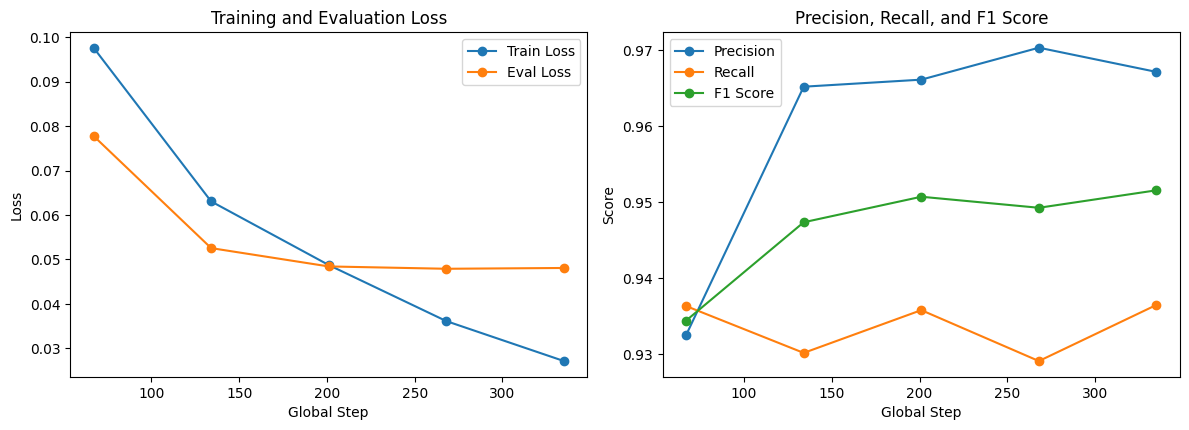

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics_dict = metrics_result[1]

if isinstance(metrics_dict, dict):
  print("is dictionary")
else:
  print("is not")

# Check if metrics_dict is a dictionary
if isinstance(metrics_dict, dict):
    # Print keys and values to inspect the structure
#    for key, value in metrics_dict.items():
#        print(f"{key}: {value}")

    # Access metrics from the dictionary
    global_steps = metrics_dict.get('global_step', [])  # Replace [] with a default value if needed
    train_losses = metrics_dict.get('train_loss', [])
    eval_losses = metrics_dict.get('eval_loss', [])
    precision = metrics_dict.get('precision', [])
    recall = metrics_dict.get('recall', [])
    f1_score = metrics_dict.get('f1_score', [])
else:
    print("The metrics_dict is not in the expected format.")

# Create a DataFrame
df = pd.DataFrame({
    'Global Step': global_steps,
    'Train Loss': train_losses,
    'Eval Loss': eval_losses,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
})

# Plotting
plt.figure(figsize=(12, 8))

# Loss Plots
plt.subplot(2, 2, 1)
plt.plot(df['Global Step'], df['Train Loss'], label='Train Loss', marker='o')
plt.plot(df['Global Step'], df['Eval Loss'], label='Eval Loss', marker='o')
plt.title('Training and Evaluation Loss')
plt.xlabel('Global Step')
plt.ylabel('Loss')
plt.legend()

# Precision, Recall, and F1 Score Plots
plt.subplot(2, 2, 2)
for metric in ['Precision', 'Recall', 'F1 Score']:
    plt.plot(df['Global Step'], df[metric], label=metric, marker='o')
plt.title('Precision, Recall, and F1 Score')
plt.xlabel('Global Step')
plt.ylabel('Score')
plt.legend()

plt.tight_layout()
plt.show()

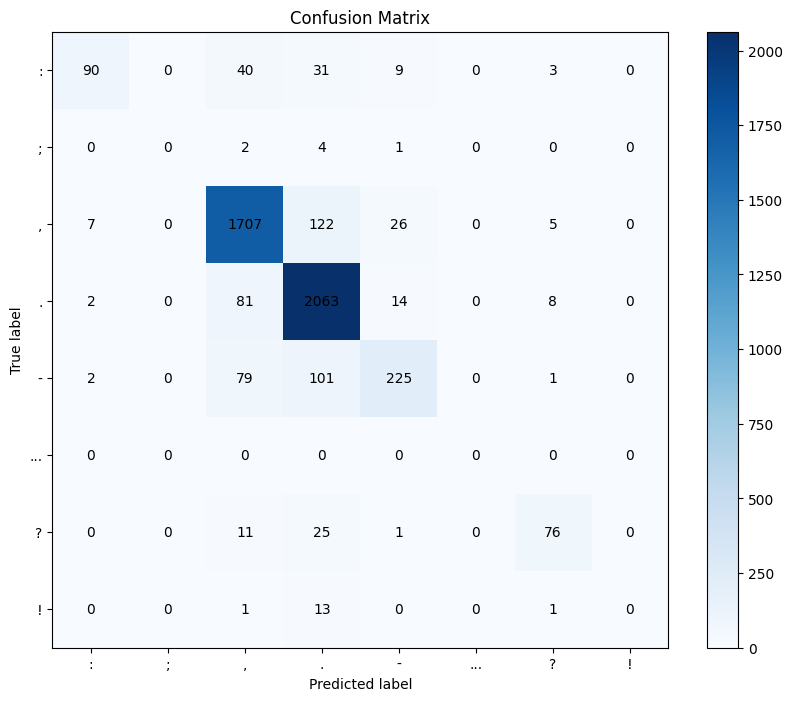

In [22]:
# Access confusion matrix from the metrics_dict
confusion_matrices = metrics_dict['confusion_matrix']

# Assuming you have multiple confusion matrices (e.g., for different evaluation steps)
# You may choose one of them or average them based on your requirements
average_conf_matrix = np.mean(confusion_matrices, axis=0).astype(int)

# Define class names based on your labels
end_labels = [':', ';', ',', '.', '-', '...', '?', '!']

# Ensure that the size of the confusion matrix matches the number of labels
if len(end_labels) != average_conf_matrix.shape[0]:
    raise ValueError("Number of labels does not match the size of the confusion matrix")

# Plot the confusion matrix with numbers
plt.figure(figsize=(10, 8))
plt.imshow(average_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(end_labels))
plt.xticks(tick_marks, end_labels)
plt.yticks(tick_marks, end_labels)

plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add numbers to the plot
for i in range(len(end_labels)):
    for j in range(len(end_labels)):
        plt.text(j, i, str(average_conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.show()

###Model prediction using AutoModelForTokenClassification with best model

In [23]:
original_text = "Obserwując polityczny rollercoaster ostatnich dni, jak mantrę powtarzamy, że Polska znalazła się na granicy ustrojowego chaosu. A wolne państwo, którego wyglądały kolejne pokolenia, pogrążą się w głębokim kryzysie - pisze dla Wirtualnej Polski prof. Sławomir Sowiński."
text = "Obserwując polityczny rollercoaster ostatnich dni jak mantrę powtarzamy że Polska znalazła się na granicy ustrojowego chaosu A wolne państwo którego wyglądały kolejne pokolenia pogrążą się w głębokim kryzysie pisze dla Wirtualnej Polski prof Sławomir Sowiński"

In [27]:
# path_to_model = '/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/best_model'
path_to_model = '/content/"/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/model_dir_allegro/herbert-large-cased_1705235363.727579/best_model'
# path_to_test = '/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/2021-punctuation-restoration/test-C/in.tsv'
# path_to_result = '/content/drive/MyDrive/Semestr_III/INL/punctuation_restoration/predictions/test-C-predictions.tsv'
# path_to_model = 'best_model'
# path_to_test = '2021-punctuation-restoration\\test-C\\in.tsv'
# path_to_result = 'predictions\\test-C-predictions.tsv'

In [25]:
import torch

In [28]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
model = AutoModelForTokenClassification.from_pretrained(path_to_model)
tokenizer = AutoTokenizer.from_pretrained(path_to_model)

In [29]:
output = model(**tokenizer.batch_encode_plus([text], add_special_tokens=True, return_tensors='pt'))

In [30]:
labels = ['B', ':', ';', ',', '.', ' -', '...', '?', '!']

####Podstawowa predykcja znaków interpunkcyjnych w tekscie

In [31]:
print("Tekst orginalny:            ", original_text)
print("Tekst na wejściu:           ", text)
print("Tekst zwrócony przez model: ", end=' ')
for preds, word in zip(output['logits'][0],text.split()):
  index = torch.argmax(preds).item()
  print(f'{word}{labels[index] if labels[index] != "B" else ""}', end=' ')



Tekst orginalny:             Obserwując polityczny rollercoaster ostatnich dni, jak mantrę powtarzamy, że Polska znalazła się na granicy ustrojowego chaosu. A wolne państwo, którego wyglądały kolejne pokolenia, pogrążą się w głębokim kryzysie - pisze dla Wirtualnej Polski prof. Sławomir Sowiński.
Tekst na wejściu:            Obserwując polityczny rollercoaster ostatnich dni jak mantrę powtarzamy że Polska znalazła się na granicy ustrojowego chaosu A wolne państwo którego wyglądały kolejne pokolenia pogrążą się w głębokim kryzysie pisze dla Wirtualnej Polski prof Sławomir Sowiński
Tekst zwrócony przez model:  Obserwując polityczny rollercoaster ostatnich dni jak mantrę powtarzamy że Polska znalazła, się na granicy ustrojowego chaosu, A, wolne, państwo którego wyglądały kolejne pokolenia pogrążą się w głębokim. kryzysie pisze dla, Wirtualnej Polski prof Sławomir, Sowiński 

#### Poprawa predykcji znaków interpunkcyjnych przez

In [32]:
batch_score, batch_pred = torch.max(output['logits'], dim=2)
print(batch_score)
print(batch_pred)

tensor([[3.1803, 5.1553, 5.1980, 5.9383, 5.4075, 4.7581, 4.9137, 4.4808, 4.8547,
         5.4290, 4.2258, 5.4009, 3.9952, 3.5126, 3.4478, 4.3446, 3.6468, 3.7925,
         5.3468, 5.6266, 5.9415, 4.8025, 6.2595, 5.5486, 5.3618, 5.1798, 2.8004,
         4.2494, 5.3268, 4.5708, 6.0857, 4.3116, 5.8355, 4.2352, 5.3993, 4.6399,
         4.7562, 6.3006, 5.8128, 3.4790, 4.5718, 5.7720, 4.6176, 5.1056, 3.9433,
         3.4794, 5.9942, 3.0927, 3.1485, 2.1104]], grad_fn=<MaxBackward0>)
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0,
         0, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 4, 0, 4,
         0, 0]])


In [33]:
batch_score = batch_score.detach().cpu().numpy()
batch_pred = batch_pred.detach().cpu().numpy()
print(batch_score)
print(batch_pred)

[[3.1802876 5.155275  5.1980143 5.9382677 5.4074783 4.7580523 4.9136887
  4.4807873 4.8547325 5.4290037 4.2258205 5.400868  3.9951854 3.512608
  3.4478471 4.3446174 3.6467822 3.7925262 5.3467617 5.626642  5.941469
  4.8024817 6.259457  5.5486073 5.3617854 5.179764  2.8003793 4.2494283
  5.32683   4.5708194 6.0856605 4.3116384 5.8355074 4.235239  5.3993354
  4.6398726 4.756244  6.300575  5.812847  3.4790177 4.5718465 5.7719555
  4.6175737 5.1055775 3.943265  3.4793727 5.994167  3.0927196 3.1485267
  2.1104221]]
[[0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 3 3 0 0 0 0 0 0 0 0 4 0 0 3 0 0 0 3 0 0
  0 0 0 5 0 0 0 0 0 4 0 4 0 0]]


In [34]:
preds = []
scores = []
scores.extend(batch_score)
preds.extend(batch_pred)
print(scores)
print(preds)

[array([3.1802876, 5.155275 , 5.1980143, 5.9382677, 5.4074783, 4.7580523,
       4.9136887, 4.4807873, 4.8547325, 5.4290037, 4.2258205, 5.400868 ,
       3.9951854, 3.512608 , 3.4478471, 4.3446174, 3.6467822, 3.7925262,
       5.3467617, 5.626642 , 5.941469 , 4.8024817, 6.259457 , 5.5486073,
       5.3617854, 5.179764 , 2.8003793, 4.2494283, 5.32683  , 4.5708194,
       6.0856605, 4.3116384, 5.8355074, 4.235239 , 5.3993354, 4.6398726,
       4.756244 , 6.300575 , 5.812847 , 3.4790177, 4.5718465, 5.7719555,
       4.6175737, 5.1055775, 3.943265 , 3.4793727, 5.994167 , 3.0927196,
       3.1485267, 2.1104221], dtype=float32)]
[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 4, 0, 4, 0, 0])]


Funkcja merge_predictions pobiera przewidywania, wyniki (wyniki pewności dla każdej przewidywania) i mapowania tokenów. Udoskonala przewidywania w oparciu o okno kontekstowe wokół każdego słowa. Dla każdego słowa uwzględnia kontekst (odległość do sąsiednich słów) i wybiera prognozę z najwyższym kontekstem. Ma to na celu połączenie przewidywań dla różnych podtokenów słowa.

In [35]:
def merge_predictions(windows_preds, windows_scores, windows_token_mappings):
        # TODO: refactor
        result_size = windows_token_mappings[-1][-2] + 1  # element at -1 corresponds to </s> token, at -2 to last word idx
        results = [0] * result_size
        result_score = [-100] * result_size

        prev_word_id = -1

        for window_preds, window_scores, window_token_mappings in \
                zip(windows_preds, windows_scores, windows_token_mappings):
            first_word_id=min([x for x in window_token_mappings if x>0])
            last_word_id=max(window_token_mappings)
            #print('first_word_id',first_word_id)
            #print('last_word_id',last_word_id)
            for pred, score, word_id in zip(window_preds, window_scores, window_token_mappings):
                if word_id == prev_word_id:
                    continue  # only check prediction for first token of the word

                prev_word_id = word_id
                if word_id == -1:
                    continue

                if pred != 0:
                    context=min(word_id-first_word_id, last_word_id-word_id)
                    #print('context', context, first_word_id, word_id, last_word_id, pred)
                    if context >= result_score[word_id]:
                        result_score[word_id] = context
                        results[word_id] = pred
        return results

Funkcja map_tokens pobiera przykład (listę słów) i tokenizer. Tokenizuje każde słowo za pomocą tokenizera, a następnie przypisuje mapowanie do każdego tokena, wskazując jego indeksy poszczególbych słów. Wynikiem jest lista indeksów każdego tokenu w przykładzie.

In [36]:
def map_tokens(example, tokenizer):
        max_seq_len = 256
        token_mappings = []
        tokens = []
        token_id_to_word_id = []
        word_id_to_tokenized_len = []

        for idx, word in enumerate(example):
            tokenized_word = tokenizer.tokenize(word)
            word_id_to_tokenized_len.append(len(tokenized_word))

            if len(tokens) + len(tokenized_word) >= max_seq_len - 1:
              print("Your example is to long")
              break

            tokens.extend(tokenized_word)
            token_id_to_word_id.extend([idx] * len(tokenized_word))

        if tokens:
            token_mappings.append([-1] + token_id_to_word_id + [-1])  # encounter for cls and sep tokens

        return token_mappings

In [37]:
token_mappings = map_tokens(text.split(), tokenizer)

In [38]:
print(token_mappings)

[[-1, 0, 0, 1, 2, 2, 2, 2, 2, 3, 4, 5, 6, 6, 6, 7, 7, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30, 30, 31, 32, 33, 34, 34, -1]]


In [39]:
concated_preds=merge_predictions(preds[:1], scores[:1], token_mappings[:1])

In [40]:
print(concated_preds)

[0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 4]


In [41]:
def ids_to_labels(preds, labels):
    return [labels[p] for p in preds]

In [42]:
predicted_label = ids_to_labels(concated_preds, labels)
print(predicted_label)

['B', 'B', 'B', 'B', ',', 'B', 'B', ',', 'B', 'B', 'B', 'B', 'B', 'B', 'B', '.', 'B', 'B', ',', 'B', 'B', 'B', ',', 'B', 'B', 'B', 'B', ' -', 'B', 'B', 'B', 'B', '.', 'B', '.']


In [43]:
predicted_text=[]
for pred, word in zip(predicted_label,text.split()):
  predicted_text.append(f'{word}{pred if pred != "B" else ""} ')

predicted_text = "".join(predicted_text)[:-1]
print("Tekst orginalny:            ", original_text)
print("Tekst na wejściu:           ", text)
print("Tekst zwrócony przez model: ", predicted_text)

Tekst orginalny:             Obserwując polityczny rollercoaster ostatnich dni, jak mantrę powtarzamy, że Polska znalazła się na granicy ustrojowego chaosu. A wolne państwo, którego wyglądały kolejne pokolenia, pogrążą się w głębokim kryzysie - pisze dla Wirtualnej Polski prof. Sławomir Sowiński.
Tekst na wejściu:            Obserwując polityczny rollercoaster ostatnich dni jak mantrę powtarzamy że Polska znalazła się na granicy ustrojowego chaosu A wolne państwo którego wyglądały kolejne pokolenia pogrążą się w głębokim kryzysie pisze dla Wirtualnej Polski prof Sławomir Sowiński
Tekst zwrócony przez model:  Obserwując polityczny rollercoaster ostatnich dni, jak mantrę powtarzamy, że Polska znalazła się na granicy ustrojowego chaosu. A wolne państwo, którego wyglądały kolejne pokolenia, pogrążą się w głębokim kryzysie - pisze dla Wirtualnej Polski prof. Sławomir Sowiński.


In [44]:
print(predicted_text==original_text)

True
